In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

from sklearn.metrics import r2_score

In [74]:
# Importing the dataset
dataset = pd.read_csv('Desktop/Datasets/regression_model_selection_data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [75]:
# If there is any, filling the missing data with the mean value
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [76]:
# Feature Scaling for SVR Model
y_scal = y.reshape(len(y),1)
sc_X = StandardScaler()
X_scal = sc_X.fit_transform(X)
sc_Y = StandardScaler()
y_scal = sc_Y.fit_transform(y_scal)

In [77]:
# Splitting the dataset into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
X_train_scal, X_test_scal, y_train_scal, y_test_scal = train_test_split(X_scal,y_scal, test_size = 0.2, random_state = 0)

Simple Linear Regression won't be used. There are four different x variables acting on the determination of the output in this dataset, therefore the linear regressor will automatically use multiple linear regression model. 

In [78]:
# Training the model with Multiple Linear Regression
# No need for fearue scaling since the coefficients take care of that
lin_regressor = LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [79]:
# Predicting the test set results with using the model of Multiple Linear Regression
y_pred_mlr = lin_regressor.predict(X_test)

In [131]:
# Training the model with Polynomial Regression 
poly_reg = PolynomialFeatures(degree = 5)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly,y_train)

LinearRegression()

In [132]:
# Predicting the test set results with using the model of Polynomial Regression
y_pred_poly = poly_regressor.predict(X_test_poly)

In [133]:
# Training the model with SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X_train_scal,y_train_scal.ravel())

SVR()

In [134]:
# Predicting the test set results with using the model of SVR
y_pred_svr = sc_Y.inverse_transform(svr_regressor.predict(X_test_scal).reshape(-1,1))
print(y_pred_svr)

[[434.04484646]
 [457.9350466 ]
 [461.01665218]
 ...
 [470.59937044]
 [439.41862499]
 [460.92145105]]


In [141]:
# Training the model with Decision Tree Regression
dec_tree_regressor = DecisionTreeRegressor(random_state = 0)
dec_tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [142]:
# Predicting the test set results with using the model of Decision Tree Regressin
y_pred_dtr = dec_tree_regressor.predict(X_test)

In [143]:
# Training the model with Random Forest Regression
rand_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rand_forest_regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [144]:
# Predicting the test set results with using the model of Random Forest Regression
y_pred_rfr = rand_forest_regressor.predict(X_test)

In [145]:
# Evaluating the R^2 Score of every model
mlr_r2_score = r2_score(y_test,y_pred_mlr)
poly_r2_score = r2_score(y_test,y_pred_poly)
svr_r2_score = r2_score(y_test,y_pred_svr)
dtr_r2_score = r2_score(y_test,y_pred_dtr)
rfr_r2_score = r2_score(y_test,y_pred_rfr)
r2_score_list = [mlr_r2_score, poly_r2_score, svr_r2_score, dtr_r2_score, rfr_r2_score]
model_name_list = ['MLR', 'PR', 'SVR', 'DTR', 'RFR']

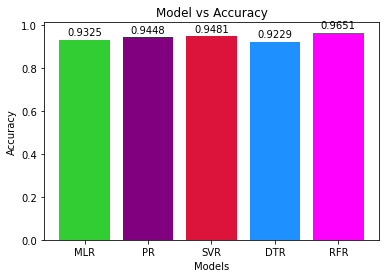

In [146]:
# Plotting the R^2 Scores of every model
plt.bar(model_name_list, r2_score_list, color = ['limegreen','purple','crimson','dodgerblue','magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model vs Accuracy')

for i, v in enumerate(r2_score_list):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
